            Value
Date             
2024-03-31  23.76
2024-03-30  25.03
2024-03-29  29.08
2024-03-28  37.89
2024-03-27  39.82


/var/folders/m8/7636l92s67q84k8h36102vj00000gn/T/ipykernel_95437/1178568570.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


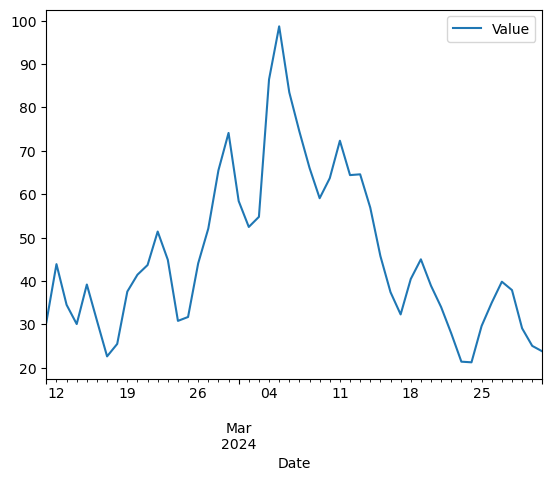

In [13]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
 
def parser(x):
 return datetime.strptime(x,'%Y-%m-%d')
 
series = read_csv('Dataset.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

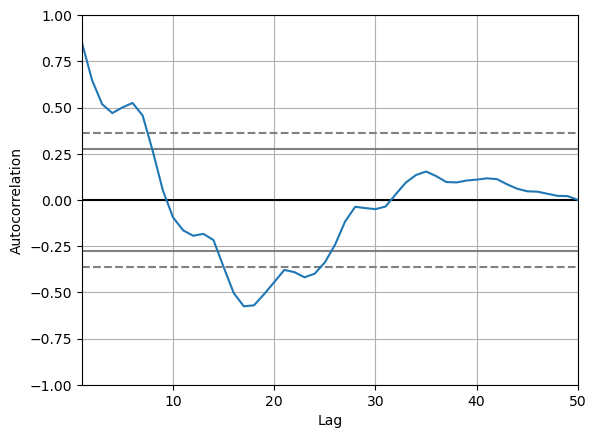

In [14]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

/var/folders/m8/7636l92s67q84k8h36102vj00000gn/T/ipykernel_95437/4081789220.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   50
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -168.997
Date:                Mon, 01 Apr 2024   AIC                            349.995
Time:                        14:39:13   BIC                            361.346
Sample:                             0   HQIC                           354.301
                                 - 50                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3500      0.148      2.368      0.018       0.060       0.640
ar.L2         -0.5395      0.156     -3.465      0.001      -0.845      -0.234
ar.L3          0.0598      0.185      0.324      0.7

/Users/spittignano/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/spittignano/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/spittignano/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


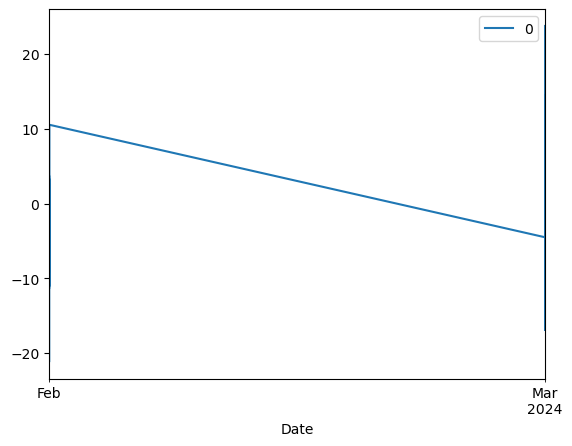

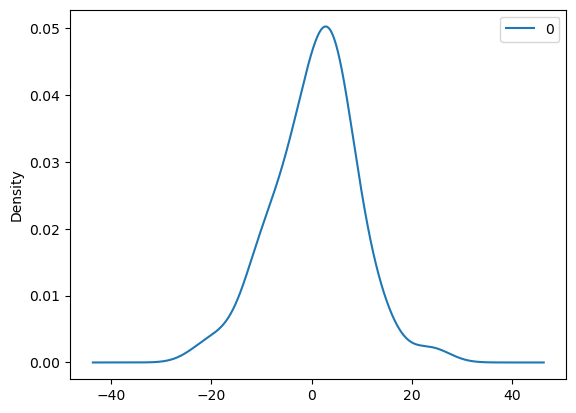

               0
count  50.000000
mean    0.661456
std     8.255607
min   -21.177978
25%    -3.450486
50%     1.688402
75%     5.198086
max    23.760000


In [16]:
# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
# load dataset
series.index = series.index.to_period('M')
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

/var/folders/m8/7636l92s67q84k8h36102vj00000gn/T/ipykernel_95437/3129828924.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


predicted=52.568946, expected=52.080000
predicted=47.537698, expected=44.050000
predicted=45.124148, expected=31.690000
predicted=35.516261, expected=30.790000
predicted=37.480523, expected=44.870000
predicted=52.240245, expected=51.380000
predicted=50.868996, expected=43.660000
predicted=35.996590, expected=41.430000
predicted=39.806394, expected=37.550000
predicted=36.772168, expected=25.480000
predicted=25.295204, expected=22.610000
predicted=27.110367, expected=30.840000
predicted=36.489635, expected=39.170000
predicted=42.071413, expected=30.060000
predicted=22.535078, expected=34.490000
predicted=37.959409, expected=43.870000
predicted=42.787770, expected=30.470000
Test RMSE: 7.619


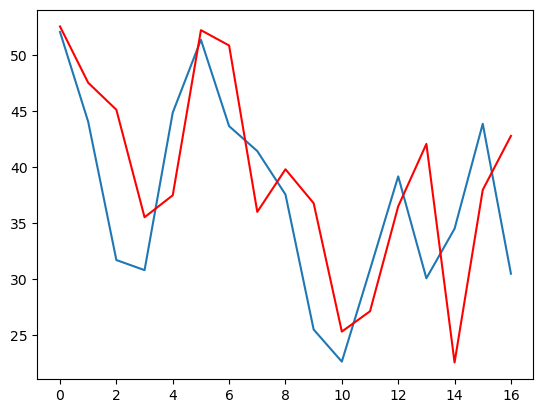

In [18]:

# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
# series.index = series.index.to_period('M')
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(5,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()